In [49]:
import numpy as np
from keras import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from matplotlib import pyplot as plt

In [50]:
(Xtrain, Ytrain), (Xtest, Ytest) = mnist.load_data()

Xtrain.shape

(60000, 28, 28)

In [51]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(20, activation='sigmoid'),
    Dense(10, activation='sigmoid')
])

model.summary()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 20)                15700     
                                                                 
 dense_21 (Dense)            (None, 10)                210       
                                                                 
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________


In [52]:
history = model.fit(Xtrain, Ytrain, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.8216 - accuracy: 0.7750
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4365 - accuracy: 0.8711
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3900 - accuracy: 0.8836
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3654 - accuracy: 0.8911
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3522 - accuracy: 0.8956
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3488 - accuracy: 0.8975
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3447 - accuracy: 0.8983
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3376 - accuracy: 0.9003
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3313 - accuracy: 0.9022
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.330

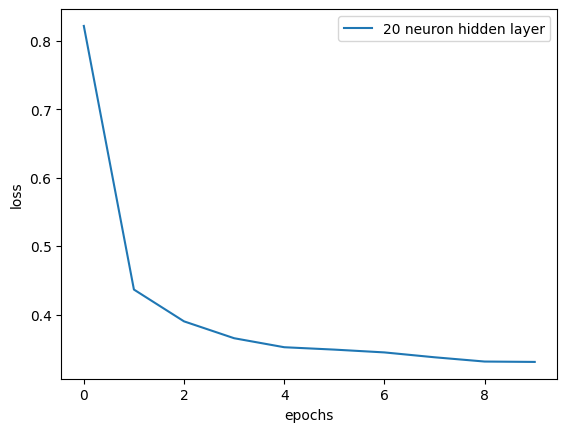

In [53]:
label = '20 neuron hidden layer'
loss = history.history['loss']
epochs = range(len(loss))
plt.plot(epochs, loss, label=label)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

In [54]:
model.evaluate(Xtest, Ytest)

313/313 [==============================] - 0s 1ms/step - loss: 0.3320 - accuracy: 0.9034


[0.33196109533309937, 0.9034000039100647]

In [57]:
predictions = [np.argmax(prediction) for prediction in model.predict(Xtest[10:20])]

1/1 [==============================] - 0s 18ms/step


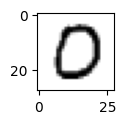

Number predicted:  0


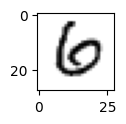

Number predicted:  6


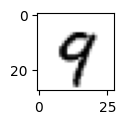

Number predicted:  9


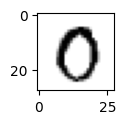

Number predicted:  0


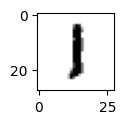

Number predicted:  1


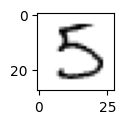

Number predicted:  5


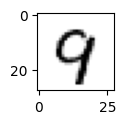

Number predicted:  9


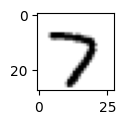

Number predicted:  7


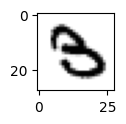

Number predicted:  2


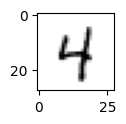

Number predicted:  4


In [58]:
for i in range(10):
    plt.figure(figsize=(1, 1))
    plt.imshow(Xtest[i + 10], cmap=plt.cm.binary)
    plt.show()
    print('Number predicted: ', predictions[i])